In [1]:
# BASIS FUNCTION REGRESSION

In [2]:
# One trick to adapt linear regression to non linear relationships between variables is to transform the data according to basis function

In [3]:
# POLYNOMIAL BASIS FUNCTION

In [5]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [6]:
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [7]:
# We see here that transformer has converted one D array to 3D array by taking the exponent of each value

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

In [13]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

In [15]:
xfit = np.linspace(0, 10, 1000)

In [16]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

In [17]:
import matplotlib.pyplot as plt

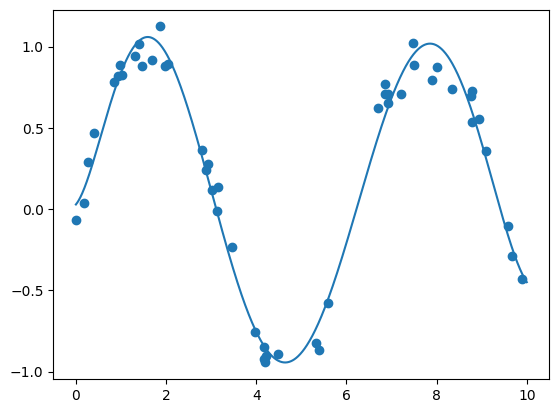

In [18]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [19]:
# GUASSIAN BASIS FUNCTION

In [20]:
# a model which is a sum of Guassian bases

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

In [41]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    # uniformly spaces gaussian features for 1D input
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y)/width
        return np.exp(-0.5*np.sum(arg**2, axis))
    
    def fit(self, x, y=None):
    # create N center spread along the data range
        self.centers_ = np.linspace(x.min(), x.max(). self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, x):
        return self.__gauss_basis(x[:,:, np.axis], self.centers_, self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

AttributeError: 'numpy.float64' object has no attribute 'self'

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'GaussianFeatures(N=20)' (type <class '__main__.GaussianFeatures'>) doesn't